In [9]:
%matplotlib notebook
%reload_ext autoreload
%autoreload

import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import vectorutils as vu
import palettize
import utils

def pcp(X, title = "", show_legend = False, color = None):
    df = pd.DataFrame(X, columns=[str(i+1) for i in range(X.shape[1])])
    df['X'] = ['X_%s' % i for i in range(X.shape[0])]
    if color is None:
        pd.plotting.parallel_coordinates(df, 'X')
    else:
        pd.plotting.parallel_coordinates(df, 'X', color = color)
    if not show_legend:
        plt.gca().legend_.remove()
    plt.title(title)
    
def rescale_by_knee(mu):
    """
    Change the sizes of the points according to the trade-off values.
    """
    nonzero_mu = [v for v in mu if v > 0.0]
    min_mu = min(nonzero_mu)
    max_mu = max(nonzero_mu)
    mu_ = vu.normalize(mu, min_mu, max_mu)
    mean_mu = math.fsum(mu_)/len(mu_)
    sd_mu = math.sqrt(math.fsum([(m - mean_mu)**2 for m in mu_])/(len(mu_) - 1))
    # sizes = [15.0 for _ in range(len(mu))]
    sizes = [((m + 0.01) * 100.0) for m in mu_]
    return sizes

def recolor_by_knee(size, color):
    max_sz = max(size)
    min_sz = min(size)
    mean_sz = math.fsum(size)/len(size)
    sd_sz = math.sqrt(math.fsum([(s - mean_sz)**2 for s in size])/(len(size) - 1))
    knee_idx = [i for i,s in enumerate(size) if s > (mean_sz + 3.0 * sd_sz)]
    min_knee = min([size[i] for i in knee_idx])
    max_knee = max([size[i] for i in knee_idx])
    # print(knee_idx, min_knee, max_knee)
    # print(max_sz, min_sz, mean_sz, sd_sz)
    for i in range(len(color)):
        if i in knee_idx:
            # color[i] = cm.Reds((size[i] - min_knee)/(max_knee - min_knee) * 2.5)
            color[i] = 'red' # cm.Reds(1.0 * 2.5)
    return (color, knee_idx)

<IPython.core.display.Javascript object>


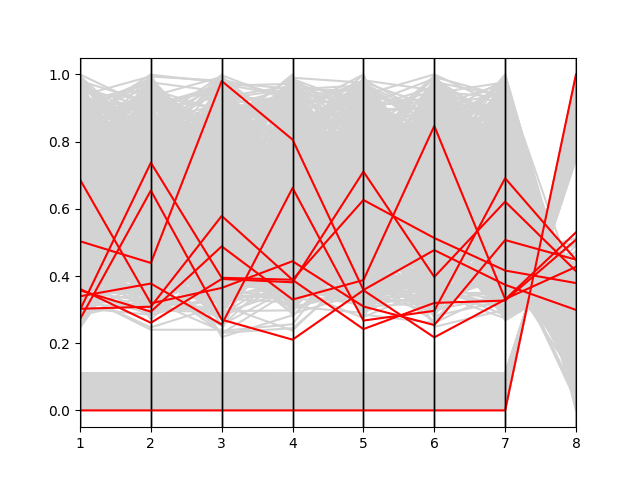

In [15]:
# prefix = "data/knee/knee-3d-norm"
# prefix = "data/knee/knee-8d-norm"
# prefix = "data/knee-const/knee-const-8d-norm"
# prefix = "data/isolated/isolated-8d-norm"
# prefix = "data/c2dtlz2/c2dtlz2-8d-norm"
prefix = "data/line/line-8d-norm"

points = utils.load(prefix + ".out")
mu = utils.load(prefix + "-mu.out")
layers = palettize.load_layer_indices(prefix + "-layers.out")

color = ['lightgrey' for _ in points]
size = rescale_by_knee(mu)
(color, knee_idx) = recolor_by_knee(size, color)

all_idx = range(len(points))
non_knee_idx = list(set(all_idx) - set(knee_idx))
knee_pts = [points[i] for i in knee_idx]
non_knee_pts = [points[i] for i in non_knee_idx]
boundary_pts = [points[i] for i in layers[0]]

F = np.array(non_knee_pts)
pcp(F, "", color = 'lightgrey')
F = np.array(knee_pts)
pcp(F, "", color = 'red')
# F = np.array(boundary_pts)
# pcp(F, "", color = 'blue')
plt.show()

outfile_name = prefix + "-pcp.pdf"
plt.savefig(outfile_name, transparent = False, bbox_inches = 'tight', pad_inches = 0)